### Переобучение, недообучение практика

<b>Задание 4.3</b>
<br>Разделите исходный набор данных на тренировочную и валидационную выборки в соотношении 70/30, используя функцию train_test_split(). В качестве значения параметра random_state возьмите число 42.

Обучите модель дерева решений с глубиной 10 (остальные параметры оставьте по умолчанию) для решения задачи классификации на тренировочной выборке. Сделайте предсказания для тренировочной и валидационной выборок и рассчитайте метрику accuracy.

В качестве ответа укажите значение метрики accuracy на тренировочной и валидационной выборках. Ответ округлите до двух знаков после точки-разделителя.

In [1]:
# Загрузка необходимых библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для обработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
from sklearn import metrics #метрики
from sklearn import model_selection #методы разделения и валидации
from sklearn import linear_model #линейные модели
from sklearn import tree #деревья решений
from imblearn.over_sampling import SMOTE #алгоритм сэмплирования
# Устанавливаем стиль визуализаций в matplotlib
plt.style.use('seaborn-v0_8')
%matplotlib inline

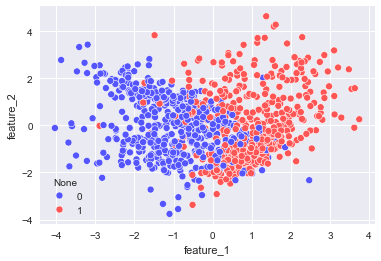

In [2]:
from sklearn import datasets
X, y = datasets.make_classification(
    n_samples=1000, #количество объектов
    n_features=2, #количество признаков
    n_informative=2, #количество информативных признаков
    n_redundant=0, #количество неинформативных признаков
    n_classes=2, #количество классов
    n_clusters_per_class=2, #количество кластеров внутри класса
    random_state=1 #генератор случайных чисел
)
X = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
y = pd.Series(y)
sns.scatterplot(x=X['feature_1'], y=X['feature_2'], hue=y, palette='seismic');

In [3]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)
print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_valid.shape}')

Train shape: (700, 2)
Test shape: (300, 2)


In [ ]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    max_depth=10 #ограничиваем глубину дерева
    ) 
model.fit(X_train, y_train) # обучаем модель на тренирововчной выборке

#Деалем предсказания для тренировочной и валидационной выборок
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
#Вычисляем значение метрик для выборок
print('-'*40)
print(f'{" " * 10}Train F1-score {metrics.f1_score(y_train, y_train_pred):.2}')
print(f'{" " * 10}Train F1-score {metrics.f1_score(y_valid, y_valid_pred):.2}')
print('-'*40)
